# Spotify Recommendations

In this project, we're going to be building a prediction model that classifies what songs we like in a given playlist. Our goal is to create a new playlist with these recommended songs.

## Setting Up

First and foremost, we need to set up by importing our libraries we will be using and using Spotify's Web API (https://developer.spotify.com/dashboard/login). After creating an application to use the API, authorize and login to your Spotify account.

In [1]:
#import pandas, numpy, spotipy, seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [2]:
#let's login and authorize
client ='c87ccfa6cec94d899bdb886a36eafc65'
secret = '561c2cf43b3f472bb22746963b8c8972'
username = '1235663476'
redirect_uri='https://developer.spotify.com/dashboard/applications/c87ccfa6cec94d899bdb886a36eafc65'

#https://developer.spotify.com/documentation/general/guides/scopes/#playlist-modify-private
#I'll be accessing a private playlist, and creating a public playlist with my recommendations
scope = 'user-library-read playlist-modify-public playlist-read-private'

#DO NOT CHANGE
client_credentials_manager = SpotifyClientCredentials(client_id = client, client_secret = secret) 
sp = spotipy.Spotify(client_credentials_manager =  client_credentials_manager)
token = util.prompt_for_user_token(username, scope, client, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

Now that we're authorized, let's load our playlists into some pandas dataframes! Let's get features from our spotify playlist and get the traits of these tracks. Each track has various audio features like liveness, acoustics, energy, danceability, tempo, etc. We will be using these features to run our model. Here's a list of these features: https://developer.spotify.com/documentation/web-api/reference/object-model/#audio-features-object


Helpful link to functions we can use in Spotipy: https://spotipy.readthedocs.io/en/latest/#features

In [3]:
def create_df(userID, playlistID):
    #load our playlist
    good_playlist = sp.user_playlist(userID, playlistID)
    songs = good_playlist["tracks"]["items"]

    #create an array of track ids (to find audio features) and create an array of song names
    track_ids = []
    song_names = []
    for i in songs:
        track_ids.append(i["track"]["id"])
        song_names.append(i["track"]["name"])

    #loop through to get audio features
    features = []
    for i in track_ids:
        for track in sp.audio_features(i):
            features.append(track)

    df = pd.DataFrame(features, index = song_names)
    return df

Now that we have a function that can create a pandas dataframe of a playlist's audio features, let's crceate a two dataframes. One will be a "good" set with all the songs we like. The other will be a "bad" set with songs we dislike.

In [4]:
good_id = '7umNGrCO2vgK5DCOadw8t1?si=U0x18FqkQvuIWC_f2xUWqg'
good_df = create_df(username, good_id)
good_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
Day 1 ◑,0.210,https://api.spotify.com/v1/audio-analysis/6ZzY...,0.503,233601,0.581,6ZzYETKetIfNUsZUb23jgG,0.000708,6,0.2570,-7.007,1,0.0881,94.555,4,https://api.spotify.com/v1/tracks/6ZzYETKetIfN...,audio_features,spotify:track:6ZzYETKetIfNUsZUb23jgG,0.633
Midsummer Madness,0.359,https://api.spotify.com/v1/audio-analysis/6Tod...,0.409,280842,0.678,6TodWdTSDfzwgYynTZSvJn,0.000005,9,0.1670,-7.731,1,0.0878,89.968,4,https://api.spotify.com/v1/tracks/6TodWdTSDfzw...,audio_features,spotify:track:6TodWdTSDfzwgYynTZSvJn,0.168
I Like U,0.071,https://api.spotify.com/v1/audio-analysis/6pAC...,0.480,267733,0.526,6pAC6ykvbcetfLl9pMQ97v,0.000000,5,0.0879,-7.099,1,0.2750,199.662,3,https://api.spotify.com/v1/tracks/6pAC6ykvbcet...,audio_features,spotify:track:6pAC6ykvbcetfLl9pMQ97v,0.374
Paris in the Rain,0.771,https://api.spotify.com/v1/audio-analysis/41Cg...,0.426,204712,0.408,41CgzGD7xlgnJe14R4cqkL,0.000008,3,0.3940,-9.419,1,0.0524,76.309,4,https://api.spotify.com/v1/tracks/41CgzGD7xlgn...,audio_features,spotify:track:41CgzGD7xlgnJe14R4cqkL,0.528
Heebiejeebies - Bonus,0.419,https://api.spotify.com/v1/audio-analysis/32xx...,0.766,220160,0.500,32xx0fAv3CIeGmNaWTHvEF,0.000000,1,0.1080,-7.626,1,0.1520,107.045,4,https://api.spotify.com/v1/tracks/32xx0fAv3CIe...,audio_features,spotify:track:32xx0fAv3CIeGmNaWTHvEF,0.495


In [5]:
bad_id = '74EBZChFKDeVVHpaoTQQcj?si=LjU_FhXESQC_0prqF36eyA'
bad_df = create_df(username, bad_id)
bad_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
Bouncin,0.31400,https://api.spotify.com/v1/audio-analysis/0BEa...,0.713,195429,0.611,0BEaYkPp5PnclzQxbNgwmM,0.000000,1,0.1170,-6.702,0,0.2410,140.061,4,https://api.spotify.com/v1/tracks/0BEaYkPp5Pnc...,audio_features,spotify:track:0BEaYkPp5PnclzQxbNgwmM,0.793
Throwin' Elbows,0.00314,https://api.spotify.com/v1/audio-analysis/6srT...,0.580,182400,0.940,6srThv0baveLRq4do7nRGB,0.042600,2,0.1130,-3.038,1,0.5670,149.990,4,https://api.spotify.com/v1/tracks/6srThv0baveL...,audio_features,spotify:track:6srThv0baveLRq4do7nRGB,0.362
All Star,0.03190,https://api.spotify.com/v1/audio-analysis/3cfO...,0.731,200373,0.861,3cfOd4CMv2snFaKAnMdnvK,0.000000,11,0.0829,-5.881,1,0.0323,104.034,4,https://api.spotify.com/v1/tracks/3cfOd4CMv2sn...,audio_features,spotify:track:3cfOd4CMv2snFaKAnMdnvK,0.780
Seven Million (feat. Future),0.05100,https://api.spotify.com/v1/audio-analysis/6j0t...,0.886,182491,0.629,6j0teRL3WdExzqmy334sh5,0.000008,1,0.1210,-4.404,0,0.3060,158.002,4,https://api.spotify.com/v1/tracks/6j0teRL3WdEx...,audio_features,spotify:track:6j0teRL3WdExzqmy334sh5,0.487
through the late night,0.36000,https://api.spotify.com/v1/audio-analysis/1Ci4...,0.744,286236,0.589,1Ci4wASMY4xtKVMeHA6Sd5,0.000000,5,0.1190,-1.218,0,0.0359,127.051,4,https://api.spotify.com/v1/tracks/1Ci4wASMY4xt...,audio_features,spotify:track:1Ci4wASMY4xtKVMeHA6Sd5,0.242


## Cleaning and Visualizing

So now that we have our dataframes, we can see there are some features we don't really need for building our model. These features are things like ID or URI, which act more as identification rather than add musical value. We want features that are about the music so let's remove these columns!

In [6]:
good_df = good_df.drop(columns=["analysis_url", "id", "track_href", "type", "uri"])
bad_df = bad_df.drop(columns=["analysis_url", "id", "track_href", "type", "uri"])

Let's use seaborn displot to see some histograms to compare how the features differ when we like vs. dislike a song!

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


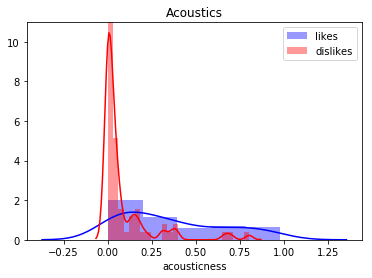

In [7]:
sns.distplot(good_df["acousticness"], color='b', label="likes")
sns.distplot(bad_df["acousticness"], color='r', label="dislikes").set_title("Acoustics")
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


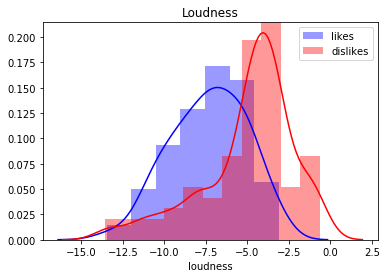

In [8]:
sns.distplot(good_df["loudness"], color='b', label="likes")
sns.distplot(bad_df["loudness"], color='r', label="dislikes").set_title("Loudness")
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


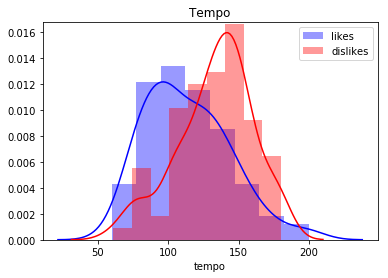

In [9]:
sns.distplot(good_df["tempo"], color='b', label="likes")
sns.distplot(bad_df["tempo"], color='r', label="dislikes").set_title("Tempo")
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


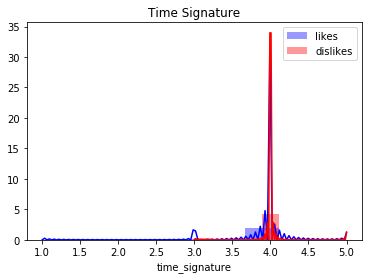

In [10]:
sns.distplot(good_df["time_signature"], color='b', label="likes")
sns.distplot(bad_df["time_signature"], color='r', label="dislikes").set_title("Time Signature")
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


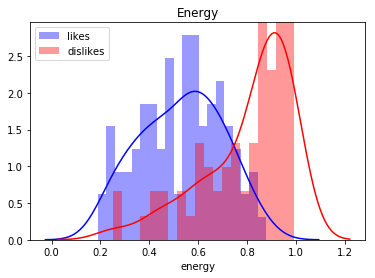

In [11]:
sns.distplot(good_df["energy"], color='b', label="likes", bins= 20)
sns.distplot(bad_df["energy"], color='r', label="dislikes", bins = 20).set_title("Energy")
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


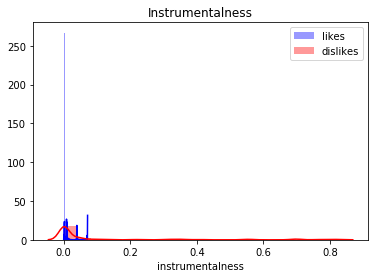

In [12]:
sns.distplot(good_df["instrumentalness"], color='b', label="likes", bins= 20)
sns.distplot(bad_df["instrumentalness"], color='r', label="dislikes", bins = 20).set_title("Instrumentalness")
plt.legend()
plt.show()

## Exploration

Let's add on other features that can possibily be useful  for our model. We can go back to look at other traits of our songs, like how popular or explicit a track is. Try playing around with these features to see if there's any noticeable difference between our liked songs and our disliked songs.

In [13]:
def find_popularity(userID, playlistID):
    playlist = sp.user_playlist(userID, playlistID)
    songs = playlist["tracks"]["items"]
    popularity = []
    for i in songs:
        popularity.append(i["track"]["popularity"])
    return popularity

In [14]:
good_popularity = find_popularity(username, good_id)
bad_popularity = find_popularity(username, bad_id)

Let's add these new features to our dataframe columns and look at the histogram of each dataframe.

In [15]:
good_df["popularity"] = good_popularity
bad_df["popularity"] = bad_popularity
bad_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
Bouncin,0.31400,0.713,195429,0.611,0.000000,1,0.1170,-6.702,0,0.2410,140.061,4,0.793,51
Throwin' Elbows,0.00314,0.580,182400,0.940,0.042600,2,0.1130,-3.038,1,0.5670,149.990,4,0.362,55
All Star,0.03190,0.731,200373,0.861,0.000000,11,0.0829,-5.881,1,0.0323,104.034,4,0.780,80
Seven Million (feat. Future),0.05100,0.886,182491,0.629,0.000008,1,0.1210,-4.404,0,0.3060,158.002,4,0.487,64
through the late night,0.36000,0.744,286236,0.589,0.000000,5,0.1190,-1.218,0,0.0359,127.051,4,0.242,70


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


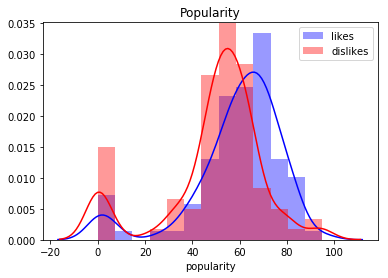

In [16]:
sns.distplot(good_df["popularity"], color='b', label="likes")
sns.distplot(bad_df["popularity"], color='r', label="dislikes").set_title("Popularity")
plt.legend()
plt.show()

Now let's look at how many explicit songs are in each playlist.

In [17]:
def find_explicit(userID, playlistID):
    playlist = sp.user_playlist(userID, playlistID)
    songs = playlist["tracks"]["items"]
    popularity = []
    for i in songs:
        popularity.append(i["track"]["explicit"])
    return popularity

In [18]:
good_explicit = find_explicit(username, good_id)
bad_explicit = find_explicit(username, bad_id)

In [19]:
good_df["explicit"] = good_explicit
bad_df["explicit"] = bad_explicit
bad_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,explicit
Bouncin,0.31400,0.713,195429,0.611,0.000000,1,0.1170,-6.702,0,0.2410,140.061,4,0.793,51,True
Throwin' Elbows,0.00314,0.580,182400,0.940,0.042600,2,0.1130,-3.038,1,0.5670,149.990,4,0.362,55,False
All Star,0.03190,0.731,200373,0.861,0.000000,11,0.0829,-5.881,1,0.0323,104.034,4,0.780,80,False
Seven Million (feat. Future),0.05100,0.886,182491,0.629,0.000008,1,0.1210,-4.404,0,0.3060,158.002,4,0.487,64,True
through the late night,0.36000,0.744,286236,0.589,0.000000,5,0.1190,-1.218,0,0.0359,127.051,4,0.242,70,True


## Adding Our Binary Classification

Now that we've got the features we want, we want to create a column for our binary classification. In this scenario, 0's stand for songs we dislike, and 1's stand for songs we like. After we create these columns, let's join our good and bad dataframes together to get one large dataframe of all of the songs we observed.

In [20]:
#add array of 1's to good_df
good_df["like/dislike"] = [1] * (len(good_df))
bad_df["like/dislike"] = [0] * (len(bad_df))
good_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,explicit,like/dislike
Day 1 ◑,0.210,0.503,233601,0.581,0.000708,6,0.2570,-7.007,1,0.0881,94.555,4,0.633,64,False,1
Midsummer Madness,0.359,0.409,280842,0.678,0.000005,9,0.1670,-7.731,1,0.0878,89.968,4,0.168,78,True,1
I Like U,0.071,0.480,267733,0.526,0.000000,5,0.0879,-7.099,1,0.2750,199.662,3,0.374,62,True,1
Paris in the Rain,0.771,0.426,204712,0.408,0.000008,3,0.3940,-9.419,1,0.0524,76.309,4,0.528,73,False,1
Heebiejeebies - Bonus,0.419,0.766,220160,0.500,0.000000,1,0.1080,-7.626,1,0.1520,107.045,4,0.495,72,True,1


In [21]:
#concatenate good_df and bad_df to one large dataframe
train_data = pd.concat([good_df, bad_df])
train_data

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,explicit,like/dislike
Day 1 ◑,0.210000,0.503,233601,0.581,0.000708,6,0.2570,-7.007,1,0.0881,94.555,4,0.633,64,False,1
Midsummer Madness,0.359000,0.409,280842,0.678,0.000005,9,0.1670,-7.731,1,0.0878,89.968,4,0.168,78,True,1
I Like U,0.071000,0.480,267733,0.526,0.000000,5,0.0879,-7.099,1,0.2750,199.662,3,0.374,62,True,1
Paris in the Rain,0.771000,0.426,204712,0.408,0.000008,3,0.3940,-9.419,1,0.0524,76.309,4,0.528,73,False,1
Heebiejeebies - Bonus,0.419000,0.766,220160,0.500,0.000000,1,0.1080,-7.626,1,0.1520,107.045,4,0.495,72,True,1
Plastic (Mid-City Island Version),0.741000,0.457,157199,0.275,0.000000,11,0.1150,-12.553,1,0.0468,120.044,4,0.180,53,False,1
Fantasy,0.355000,0.686,218947,0.755,0.000000,4,0.1380,-6.213,0,0.0916,113.860,4,0.344,48,False,1
Sunday Candy,0.530000,0.511,226014,0.596,0.000000,0,0.0798,-6.560,1,0.2240,158.063,4,0.554,69,False,1
Lemonade - Ukulele Version,0.868000,0.546,181505,0.221,0.000000,2,0.0994,-8.915,1,0.0630,128.144,4,0.593,4,False,1
Chivalry Is Dead,0.021400,0.690,209446,0.732,0.000000,6,0.0579,-5.499,1,0.0444,129.875,4,0.661,0,False,1


# Classification

To begin our classification, we're going to need to split our data. We want to have one set to  train our model and one set to test our model's accuracy. We will be using sklearn train-test-split function to do so. A good ratio to split our data is 80% training data to 20% testing data.

In [58]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_data, test_size = 0.2)
train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,explicit,like/dislike
Thinking Out Loud,0.47400,0.781,281560,0.445,0.0000,2,0.1840,-6.061,1,0.0295,78.998,4,0.591,83,False,1
Blast Ya (feat. Barrington Levy),0.02250,0.817,211200,0.922,0.0000,6,0.0986,-0.819,0,0.2510,149.935,4,0.545,45,False,0
Vault,0.00781,0.420,297742,0.962,0.0128,1,0.3720,-1.892,1,0.6110,160.022,4,0.147,55,True,0
Resurrected - Original Mix,0.00151,0.611,207857,0.986,0.4090,9,0.4160,-2.049,1,0.0643,140.023,4,0.508,0,True,0
instagram,0.19600,0.462,255729,0.549,0.0000,8,0.2840,-6.279,1,0.1510,93.892,4,0.203,67,False,1


In order to build better models, we need to want to select relevant features. Why? When we build a model, we can come across errors with our modeling due to things like variance or bias. This way we can improve our model by improving runtime or preventing overfitting.

In [96]:
features = ["acousticness", "instrumentalness", "loudness", "energy", "tempo","popularity", "speechiness"]
train_x = train[features]
train_y = train["like/dislike"]
test_x = test[features]
test_y = test["like/dislike"]

In [97]:
### do this: normalize popularity

## Logistic Regression Model

In [98]:
#play around with L1 (Lasso) and L2 (Ridge) penalty
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l1")
lr.fit(train_x, train_y)
y_pred = lr.predict(test_x)
lr.score(test_x, test_y)

0.8333333333333334

## K-nearest Neighbors 

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
knn.score(test_x, test_y)

0.6111111111111112

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rf.fit(train_x, train_y)
y_pred = rf.predict(test_x)
rf.score(test_x, test_y)

0.9166666666666666

## Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_samples_split=100)
dt.fit(train_x, train_y)
y_pred = dt.predict(test_x)
dt.score(test_x, test_y)

0.8611111111111112